# Fundamentals of Data Analysis Tasks

__Rebecca Hannah Quinn__

### Task 1: Collatz Conjecture

> The Collatz conjecture is a famouse unsilved problem in mathematics. The problem is to prove that if you start with any positive integer $x$ and repeatedly apply the function $f(x)$ below.

__This task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.__

![Collatz Conjecture Equation](https://bpb-us-e1.wpmucdn.com/sites.dartmouth.edu/dist/4/417/files/2019/11/gyorda_article_1_picture.png)

In [ ]:
#defines the basic function of the collatz conjuncture
def f(x):
    #if the integer can be divided by 2 (is even) then divide by two and return answer
    if x % 2 == 0:
        return x // 2
    #otherwise the integer is determind odd so multiply by 3 and add 1
    else:
        return (3 * x) + 1

In [ ]:
#function to print the results and to loop the function
def collatz(x):
    # Prints a formatted statement with the current integer to verify
    print(f'Testing Collatz with the initial value of {x}')
    #Loops the function as long as the interger results from the above function does not equal 1
    while x != 1:
        x = f(x)
        #formats the results below with spacing and commas
        print(x, end=', ')

In [ ]:
# Integer to verify using above function, calling the function with the integer we must verify
print(collatz(10000))

---

### Task 2: Penguins Data Set

> An overview of the famous penguins data set, explaining the types of variables it contains and suggestions of variables that should be used to model them in Python and why.



The dataset known as the "penguin" dataset refers to the Palmer Penguins dataset collected between 2007 and 2009 in the Palmer Archipelago in Antartica. It lists the species information on three species of Penguin. These measurements include the bill length and depth, flipper length, body mass and the island, species name and sex catagories. These measurements when investigated can help us to understand the characteristics and behaviours of the three species of Penguin - Chinstrap, Gentoo and Adélie.

[^1]

The data types are strings and numerical. 

| **Chinstrap** | **Gentoo** | **Adélie** |
| ------------- | ---------- | ---------- |
| ![Chinstrap Penguin](https://github.com/rebhanqui/data_funds/blob/main/Tasks/Images/chinstrappenguin.jpeg?raw=true) | ![Gentoo Penguin](https://github.com/rebhanqui/data_funds/blob/main/Tasks/Images/gentoopenguin.png?raw=true) | ![Adélie Penguin](https://github.com/rebhanqui/data_funds/blob/main/Tasks/Images/adeliepenguin.jpeg?raw=true) |
| | | NOOT NOOT |

---

### Task 3: Variables and Random Distributions 

> Suggest which probability distribution from NumPy random distributions list that is most appropriate to model each of the variables in the "penguins" dataset.

#### Variables and Their Random Probability Distributions

| Variable | Random Probability Distribution Type | Reasoning |
| -------- | ------------------------------- | --------- |
| species | multinomial distribution | as there are more than 2 possible species, the multinomical distribution used on the catagorical variable alows us to investigate the distribution and frequency of the species and their island habitats |
| island | multinomial distribution | as there are more than 2 islands named, the multinomical distribution used on the catagorical variable alows us to investigate the distribution and frequency of the species and their island habitats |
| sex | binomial distribution | as the outcome is catagorical but has only two outcomes: male or female |
| bill_length_mm | normal distribution | as it is a continuous numerical measurement |
| bill_depth_mm | normal distribution | as it is a continuous numerical measurement |
| flipper_length_mm | normal distribution | as it is a continuous numerical measurement |
| body_mass_g | normal distribution | as it is a continuous numerical measurement |

[^2] [^3] [^4] [^5] [^6]

---


### Task 4: Plot the Entropy

> Suppose you are flipping two coins, each with a probability of **p** of giving heads. Plot the entropy of the total number of heads verses **p**.

The probability distribution of coin flipping would be binomial, as there are only one of two end results.

### Task 5: Plotting the Penguin Data Set

> Create appropriate individual plots for each variable in the Penguin Data Set

#### Summarizing The Penguin Dataset

To get the basic information of the data we will summarize it with `head()`, `shape()` to how much data we are working with and a small look at the data and it's variables we need to work with. We also check how many values there are of particular variables with `value_counts()` for `sex`, `species`, and `island`. Then we check for null values through out and print a summary of the data into a file to compare the results of our plots with.

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = pd.read_csv("/Users/rebeccaquinn/Desktop/Data Analysis 22-24/S2-23/data_funds/Tasks/Relevant Files/penguins.csv")
print(penguins.head())


print("The penguin dataset contains (Rows, Columns):")
penguins.shape

In [ ]:
#checks the count of each species
print(penguins.value_counts("species"))

print(penguins.value_counts("island"))

print(penguins.value_counts("sex"))

In [ ]:
#checks for null values
print(penguins.isnull().sum())

In [ ]:
#summarize the information in order to read/write new file
summarize = penguins.describe()
#Outputs a summary of each variable to a single text file:
with open ("summary.txt", "w+") as file:
    file.write(summarize.to_string())
file.close()

#[^8] [^9] [^10] [^11] [^12]

#### Scatterplot

A scatterplot is used to visualise relationships between pairs. Below I have created a group of subplots containing 3 scatterplots that show bill length and bill depth with the hue of the 3 catagorical variables: `species`, `island` and `sex`.

For `species` it shows us majority of each species share close enough attributes with some rare outliers. The **Gentoo** and the **Adelie** are furthest apart in their attributes and their measurements. 
For the `islands` it shows the **Adelie** penguins on **Torgeson** have more variation in their bills. Where as the **Chinstrap** and **Gentoo** pengjuins that are on their favoured island have a small variation size in bill measurements.
Between the two sexes the measurements are mostle shared with female penguins across the board have smaller length and depth bills.

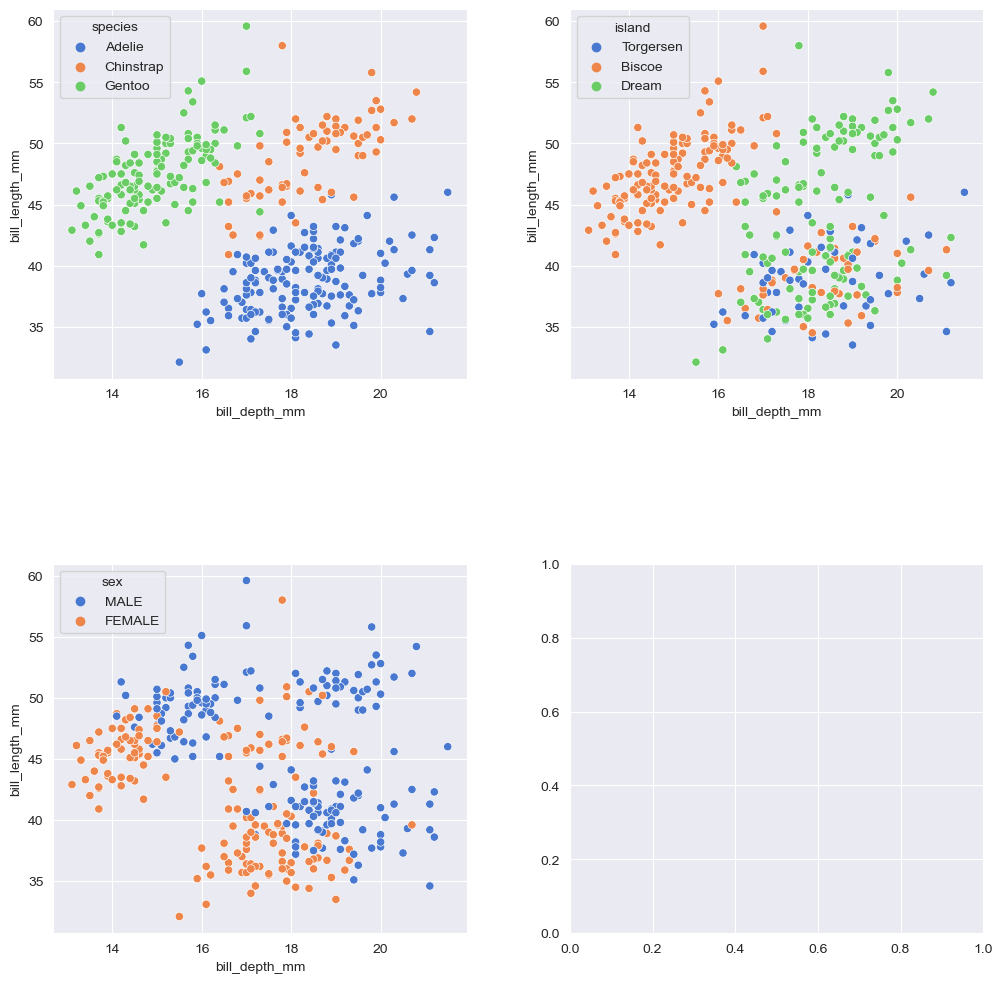

In [178]:
import seaborn as sns

plt.rcParams["figure.figsize"] = [12.00, 12.00]
fig, axes = plt.subplots(2, 2)

# Adjust the subplot 
fig.subplots_adjust(hspace=0.50, wspace=0.25)

sns.scatterplot(data=penguins, x="bill_depth_mm", y="bill_length_mm", hue="species", ax=axes[0,0])
sns.scatterplot(data=penguins, x="bill_depth_mm", y="bill_length_mm", hue="island", ax=axes[0,1])
sns.scatterplot(data=penguins, x="bill_depth_mm", y="bill_length_mm", hue="sex", ax=axes[1,0])

plt.show()
#plt.savefig("./Images/scatterplot_variables.jpeg")

plt.close()

#[^13] [^14] [^15]

#### Pairplot

The pair plot is used to identify correlations and view insights quickly and all at once similar to pairgrid and jointgrids. It is more effcicient than plotting each individually like with the replot.

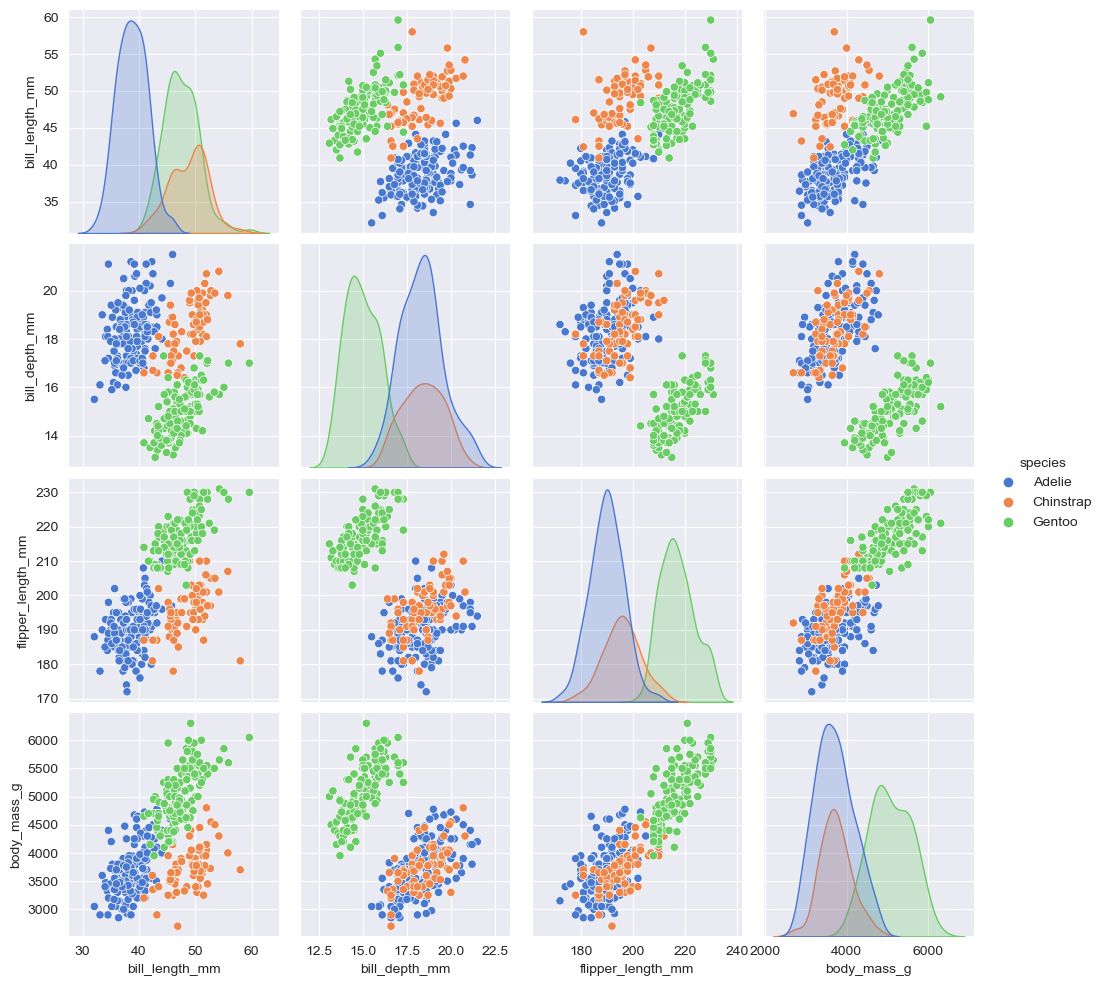

In [179]:
sns.pairplot(data=penguins, hue="species")

#[^16]

#### Cat Plot

The cat plot is used to get a clear picture of the numerical data for each categorical variable. Below we can see more information on bill measurements, flipper measurements, and body mass verses penguin sexes and while showing the species using the `hue=` arg.

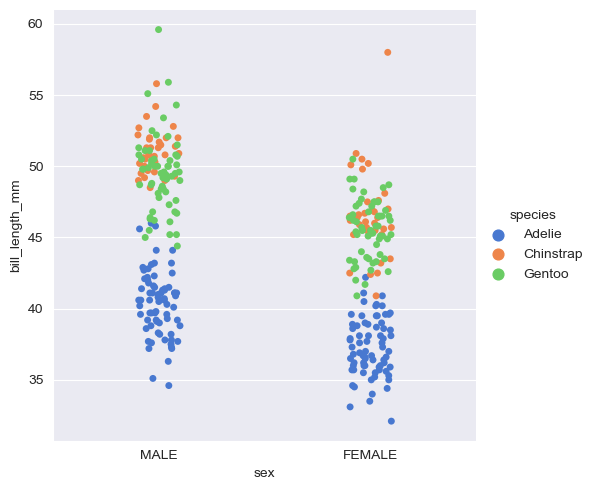

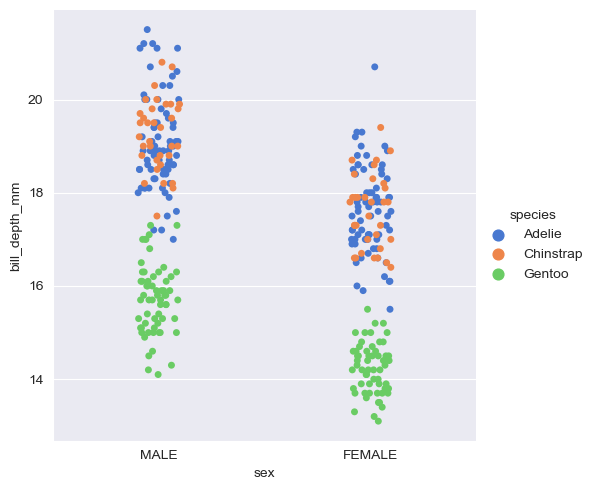

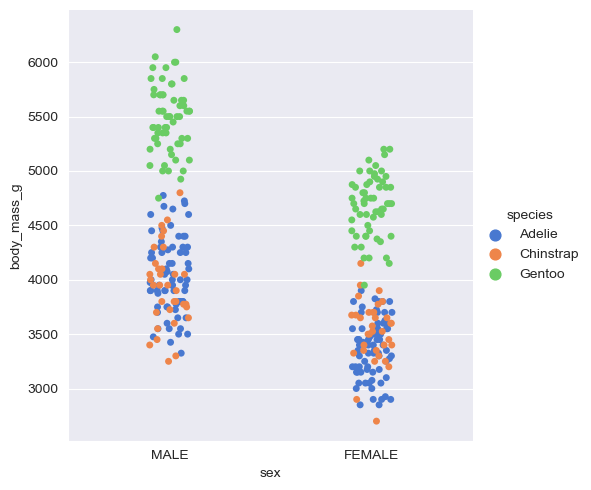

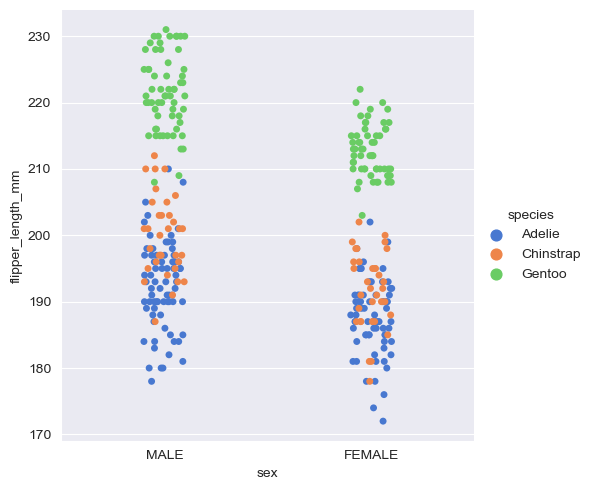

In [175]:
sns.catplot(data=penguins, x="sex", y="bill_length_mm", hue="species")
sns.catplot(data=penguins, x="sex", y="bill_depth_mm", hue="species")
sns.catplot(data=penguins, x="sex", y="body_mass_g", hue="species")
sns.catplot(data=penguins, x="sex", y="flipper_length_mm", hue="species")

#[^17]

#### Histogram Plot

The histograms are used to show a quick count of the species on a specific island. The plots below are stacked to make it clear to read the graph. This helps to confirm the basic data summarised originally and after in more detailed graphs. The second shows the distributuion of the sexes between the species.

<AxesSubplot:xlabel='species', ylabel='Count'>

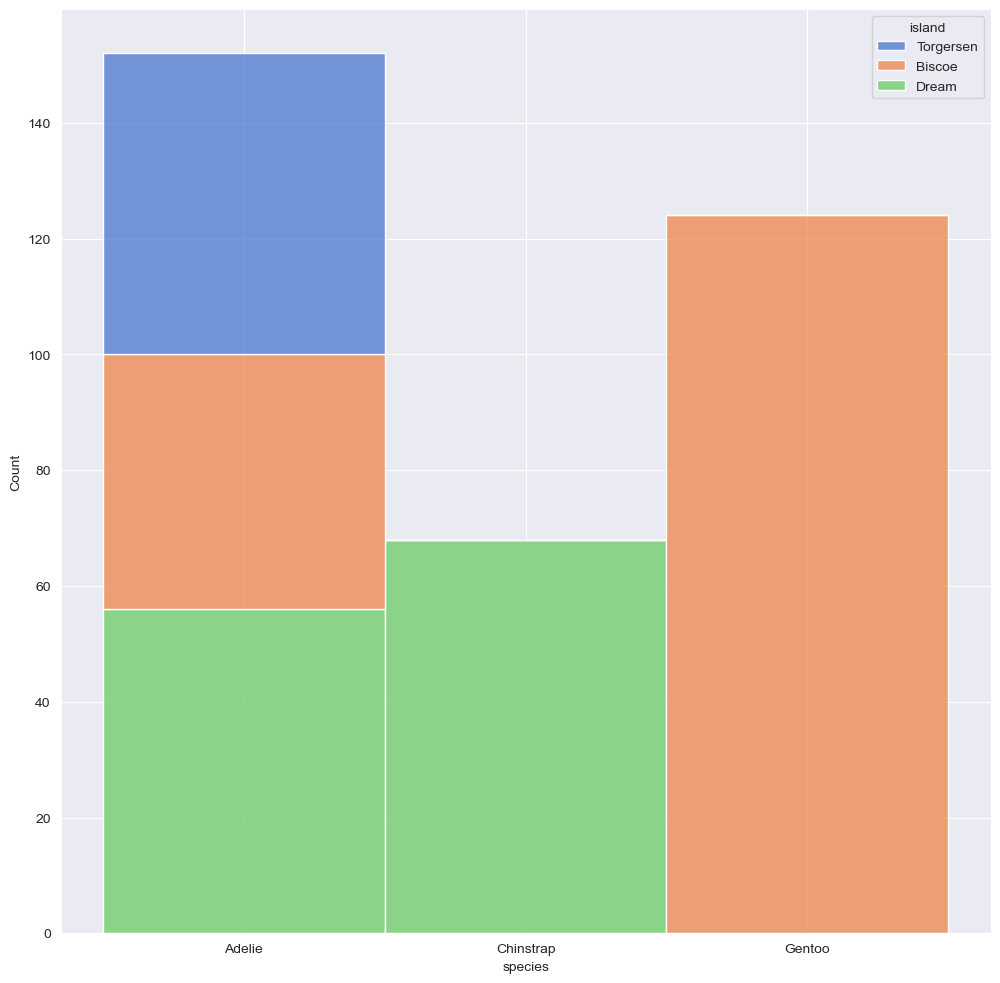

In [176]:
sns.histplot(data=penguins, x="species", hue="island", multiple="stack")

<AxesSubplot:xlabel='species', ylabel='Count'>

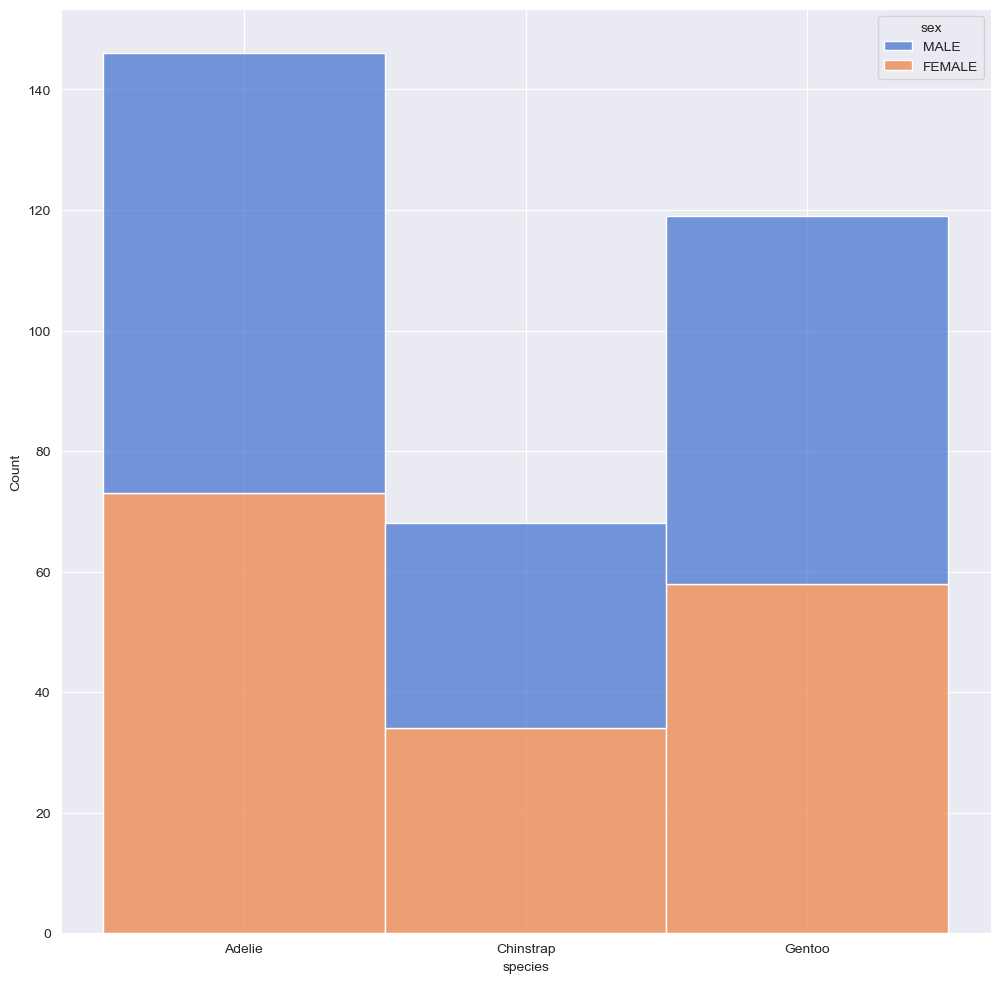

In [177]:
sns.histplot(data=penguins, x="species", hue="sex", multiple="stack")

[^18]


---

## References:

[^1]: “Penguins Dataset - Palmer” https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv
[^2]: “numpy.random.multinomial — NumPy v1.26 Manual” https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html
[^3]: “numpy.random.binomial — NumPy v1.26 Manual” https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
[^4]: “numpy.random.normal — NumPy v1.26 Manual” https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
[^5]: “The Anatomy of Data” https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5958489/#:~:text=A qualitative variable, also called,categorical data: nominal and ordinal. 
[^6]: “Categorical and Numerical Types of Data | 365 Data Science” https://365datascience.com/tutorials/statistics-tutorials/numerical-categorical-data/
[^7]: “Types of data & the scales of measurement” https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Scales of measurement is how,to properly analyse the data.
[^8]: “pandas.DataFrame.head — pandas 2.1.4 documentation” https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
[^9]: “pandas.DataFrame.info — pandas 2.1.4 documentation https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
[^10]: “pandas.DataFrame.shape — pandas 2.1.4 documentation” https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
[^11]: “Pandas DataFrame describe() Method” https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The describe() method returns,The average (mean) value.
[^12]: “pandas.DataFrame.isnull” — pandas 2.1.4 documentation” https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
[^13]: “seaborn.scatterplot — seaborn 0.13.1 documentation https://seaborn.pydata.org/generated/seaborn.scatterplot.html
[^14]: “How to Add a Title to Seaborn Plots (With Examples)” https://www.statology.org/seaborn-title/
[^15]: “How to adjust the space between Matplotlib/Seaborn subplots for multi-plot layouts?” https://www.tutorialspoint.com/how-to-adjust-the-space-between-matplotlib-seaborn-subplots-for-multi-plot-layouts
[^16]: “seaborn.pairplot — seaborn 0.13.1 documentation” https://seaborn.pydata.org/generated/seaborn.pairplot.html
[^17]: “seaborn.catplot — seaborn 0.13.1 documentation” https://seaborn.pydata.org/generated/seaborn.catplot.html
[^18]: “seaborn.histplot — seaborn 0.13.1 documentation” https://seaborn.pydata.org/generated/seaborn.histplot.html
[^19]: “Markdown Cheat Sheet | Markdown Guide” https://www.markdownguide.org/cheat-sheet/

---

## End